In [1]:
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.facecolor'] = '#00000000'

In [3]:
data = pd.read_csv('medical.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.sample(5)

,age,sex,bmi,children,smoker,region,charges
341,62,male,30.020,0,no,northwest,13352.09980
889,57,male,33.630,1,no,northwest,11945.13270
884,25,male,26.695,4,no,northwest,4877.98105
1277,32,female,29.735,0,no,northwest,4357.04365
225,55,male,33.880,3,no,southeast,11987.16820


# cleaning the dataset

In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# analysis

In [8]:
data['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [9]:
fig = px.histogram(data,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Age distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
fig = px.histogram(data,
                    x='bmi',
                    marginal='box',
                    nbins=47,
                    color_discrete_sequence=['red'],
                    title='BMI Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [11]:
fig = px.histogram(data,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
fig = px.histogram(data,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [13]:
fig = px.histogram(data,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [14]:
data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [15]:
px.histogram(data, x='smoker', color='sex', title='Smoker Distribution')

In [16]:
px.histogram(data, x='sex', title='Smoker Distribution')

In [17]:
px.histogram(data, x='region', color='sex', title='Smoker Distribution')

In [18]:
px.histogram(data, x='children', color='sex', title='Smoker Distribution')

In [19]:
fig = px.scatter(data,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [20]:
fig = px.scatter(data,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [21]:
px.violin(data,
            x='children',
            y='charges',
            title='BMI vs Charges')

<Axes: xlabel='sex', ylabel='charges'>

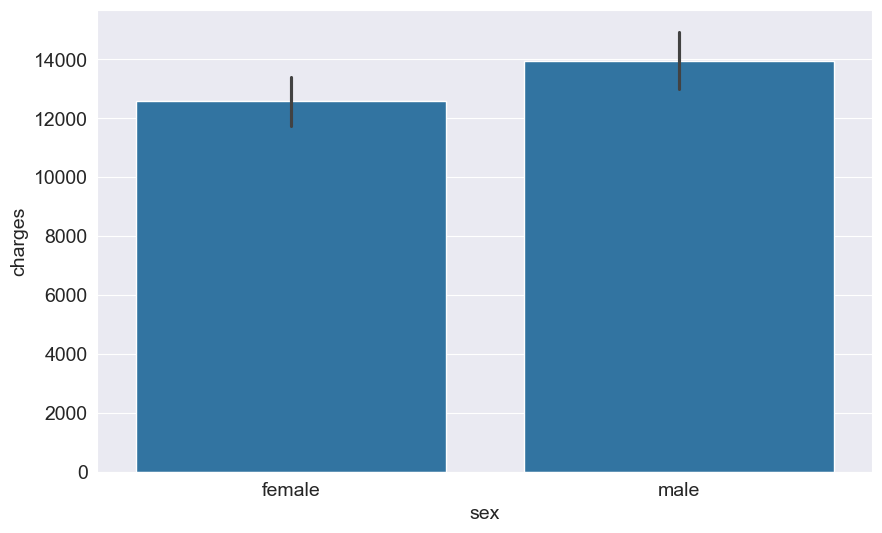

In [22]:
sns.barplot(data=data,
            x='sex',
            y='charges',)

<Axes: xlabel='region', ylabel='charges'>

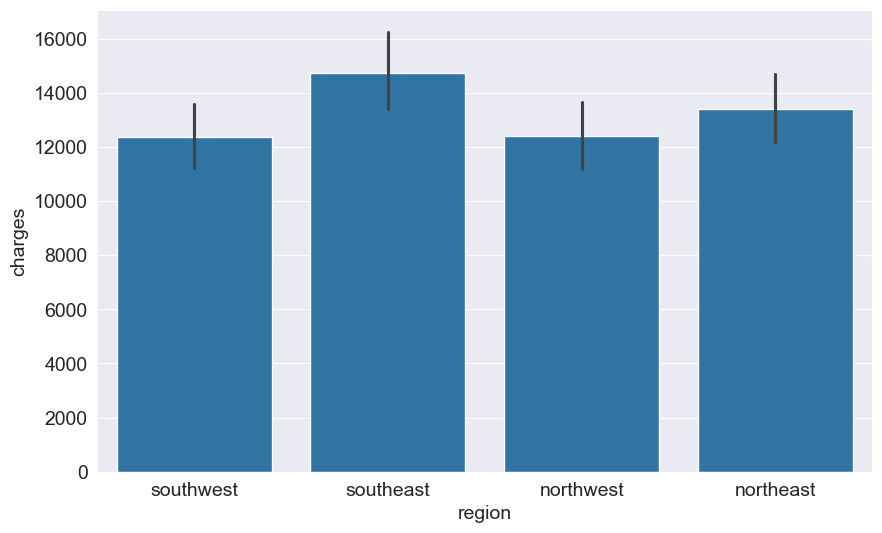

In [23]:
sns.barplot(data=data,
            x='region',
            y='charges',)

<Axes: xlabel='smoker', ylabel='charges'>

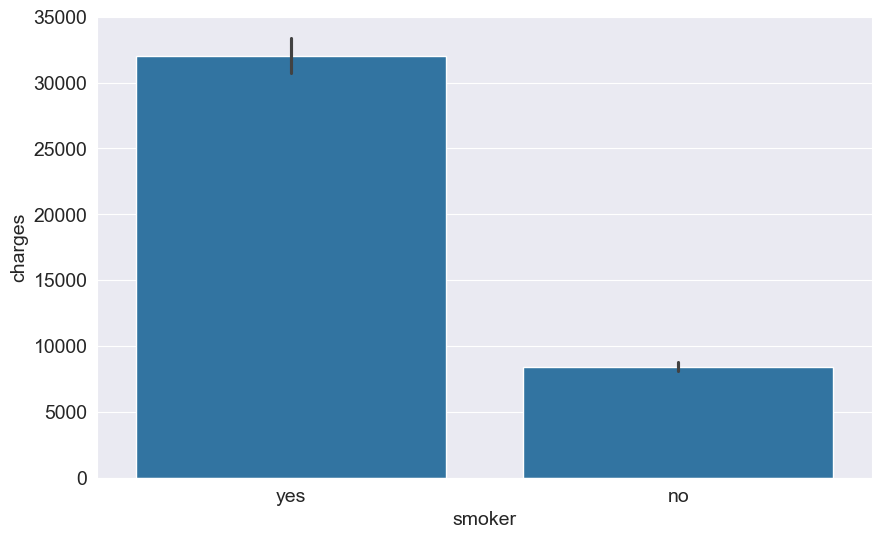

In [24]:
sns.barplot(data=data,
            x='smoker',
            y='charges',)

# correlation

In [25]:
data['charges'].corr(data['age'])

0.2990081933306476

In [26]:
data['charges'].corr(data['bmi'])

0.19834096883362895

In [27]:
data['charges'].corr(data['children'])

0.06799822684790488

In [28]:
smoker_values = {'no':0, 'yes':1}
smoker_numeric = data['smoker'].map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [29]:
data['charges'].corr(smoker_numeric)

0.7872514304984772

# linear regression using a single feature